In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [3]:
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [4]:
X_train_backup = X_train.copy()
y_train_backup = y_train.copy()

In [5]:
X_train.shape

(1221327, 48)

In [6]:
feature_definitions = pd.read_csv('home-credit-credit-risk-model-stability/feature_definitions.csv')
feature_definitions

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actu...
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.
...,...,...
460,totinstallast1m_4525188A,Total amount of monthly instalments paid in th...
461,twobodfilling_608L,Type of application process.
462,type_25L,Contact type of a person.
463,typesuite_864L,Persons accompanying the client during the loa...


# Data Cleaning and Preprocessing

## Missing Values

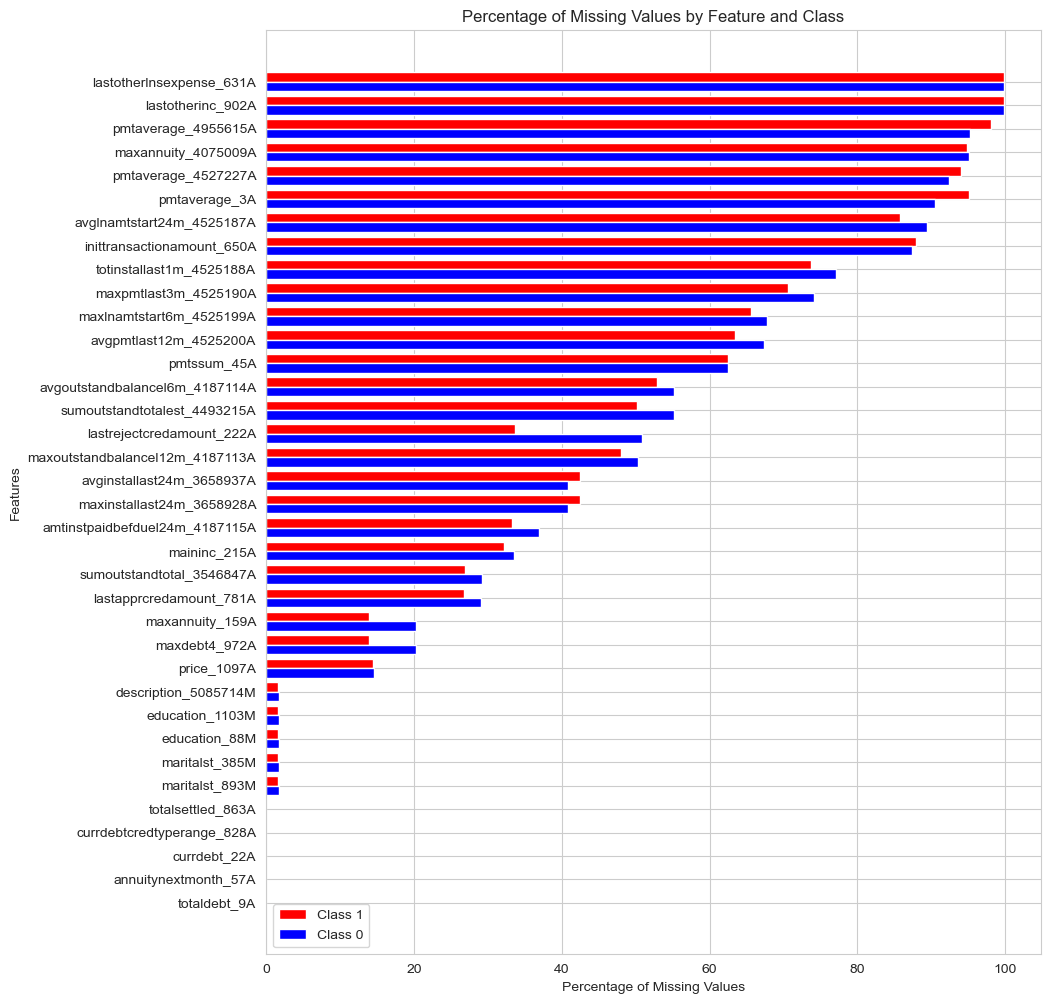

,PercentageMissing,Class 1 Missing,Class 0 Missing,Description
lastotherlnsexpense_631A,99.797515,99.835728,99.796277,Monthly expenses on other loans from the last ...
lastotherinc_902A,99.797188,99.825298,99.796277,Amount of other income reported by the client ...
pmtaverage_4955615A,95.294053,98.117389,95.202523,Average of tax deductions.
maxannuity_4075009A,95.037447,94.753722,95.046645,Maximal annuity offered to the client in the c...
pmtaverage_4527227A,92.478755,94.036661,92.428249,Average of tax deductions.
pmtaverage_3A,90.603827,95.090089,90.458386,Average of tax deductions.
avglnamtstart24m_4525187A,89.344868,85.726578,89.462170,Average loan amount in the last 24 months.
inittransactionamount_650A,87.402800,87.982060,87.384021,Initial transaction amount of the credit appli...
totinstallast1m_4525188A,76.926818,73.721676,77.030726,Total amount of monthly instalments paid in th...
maxpmtlast3m_4525190A,73.988866,70.597898,74.098798,Maximum payment made by the client in the last...


In [7]:
# Calculate the percentage of missing values for each feature overall and within each class
total_missing = X_train.isnull().mean() * 100
class_1_missing = X_train[y_train == 1].isnull().mean() * 100
class_0_missing = X_train[y_train == 0].isnull().mean() * 100

# Create a DataFrame with the correlation and missing values information

#correlations = X_train.corrwith(y_train, numeric_only=False).drop('target')

correlation_and_missing_df = pd.DataFrame({
    #'CorrelationWithTarget': np.abs(correlations),
    'PercentageMissing': total_missing.values,
    'Class 1 Missing': class_1_missing.values,
    'Class 0 Missing': class_0_missing.values,
    'Description': feature_definitions.set_index('Variable').loc[total_missing.index, 'Description']
})

# Filter out features with X% or more missing values
correlation_and_missing_df = correlation_and_missing_df[correlation_and_missing_df['PercentageMissing'] > 0]


# Sort the DataFrame by the total missing values to maintain the order for plotting
correlation_and_missing_df.sort_values(by='PercentageMissing', ascending=False, inplace=True)

# Plotting the missing values by class, with horizontal bars
fig, ax = plt.subplots(figsize=(10, 12))
ind = np.arange(len(correlation_and_missing_df))  # the x locations for the groups
width = 0.4  # the width of the bars

p1 = ax.barh(ind, correlation_and_missing_df['Class 1 Missing'], width, color='red', label='Class 1')
p2 = ax.barh(ind + width, correlation_and_missing_df['Class 0 Missing'], width, color='blue', label='Class 0')

ax.set_title('Percentage of Missing Values by Feature and Class')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(correlation_and_missing_df.index)
ax.legend()

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

# Inverting y-axis to have the feature with most missing values on top
plt.gca().invert_yaxis()

plt.show()

correlation_and_missing_df

Dropped features: Index(['lastotherlnsexpense_631A', 'lastotherinc_902A', 'pmtaverage_4955615A',
       'maxannuity_4075009A', 'pmtaverage_4527227A', 'pmtaverage_3A',
       'avglnamtstart24m_4525187A', 'inittransactionamount_650A',
       'totinstallast1m_4525188A', 'maxpmtlast3m_4525190A',
       'maxlnamtstart6m_4525199A', 'avgpmtlast12m_4525200A', 'pmtssum_45A',
       'avgoutstandbalancel6m_4187114A', 'sumoutstandtotalest_4493215A'],
      dtype='object')


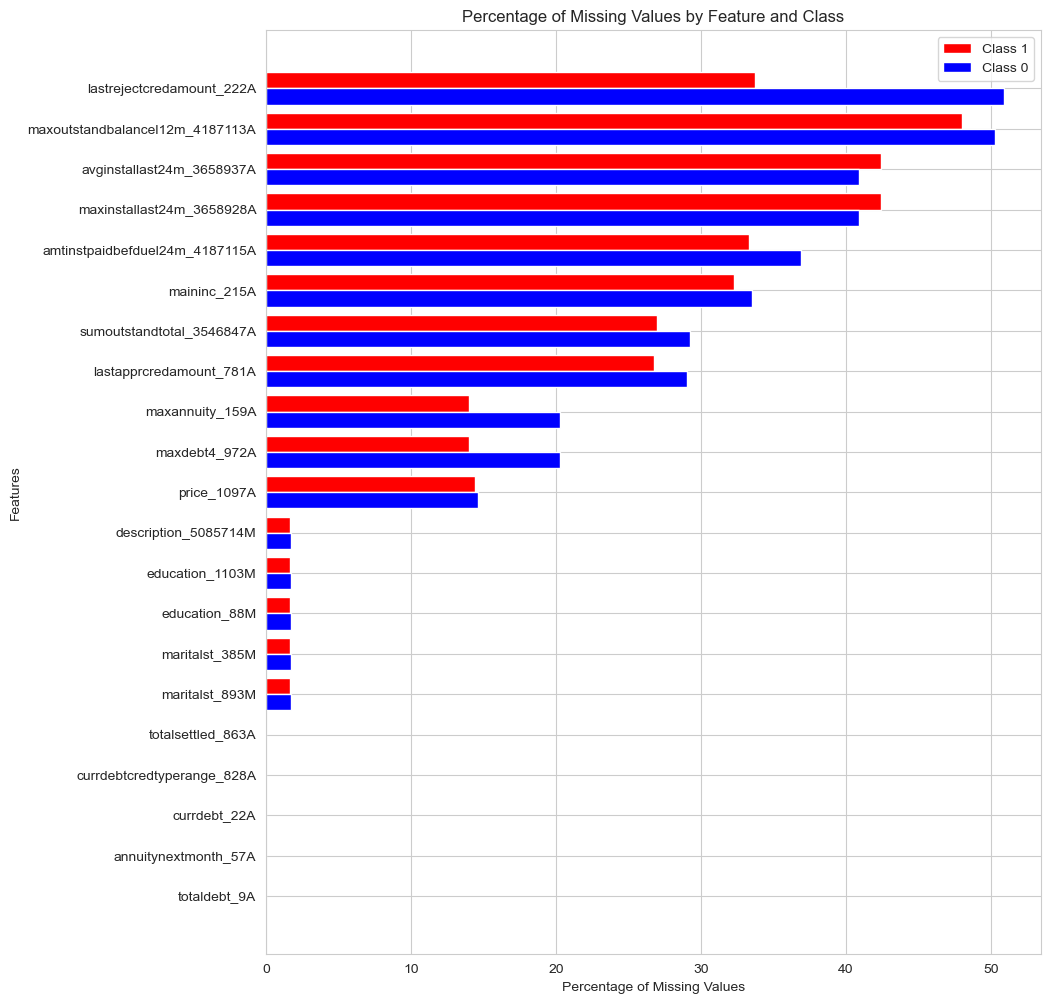

In [8]:
# Drop features with more than 50% missing values and print which features were dropped
X_train = X_train.drop(correlation_and_missing_df[correlation_and_missing_df['Class 1 Missing'] >= 50].index, axis=1)
X_test = X_test.drop(correlation_and_missing_df[correlation_and_missing_df['Class 1 Missing'] >= 50].index, axis=1)
dropped_features = correlation_and_missing_df[correlation_and_missing_df['Class 1 Missing'] >= 50]
print('Dropped features:', dropped_features.index)

correlation_and_missing_df = correlation_and_missing_df[correlation_and_missing_df['Class 1 Missing'] < 50]

# Plotting the missing values by class, with horizontal bars
fig, ax = plt.subplots(figsize=(10, 12))
ind = np.arange(len(correlation_and_missing_df))  # the x locations for the groups
width = 0.4  # the width of the bars

p1 = ax.barh(ind, correlation_and_missing_df['Class 1 Missing'], width, color='red', label='Class 1')
p2 = ax.barh(ind + width, correlation_and_missing_df['Class 0 Missing'], width, color='blue', label='Class 0')

ax.set_title('Percentage of Missing Values by Feature and Class')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(correlation_and_missing_df.index)
ax.legend()

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

# Inverting y-axis to have the feature with most missing values on top
plt.gca().invert_yaxis()

plt.show()

In [9]:
# show dropped features
dropped_features

,PercentageMissing,Class 1 Missing,Class 0 Missing,Description
lastotherlnsexpense_631A,99.797515,99.835728,99.796277,Monthly expenses on other loans from the last ...
lastotherinc_902A,99.797188,99.825298,99.796277,Amount of other income reported by the client ...
pmtaverage_4955615A,95.294053,98.117389,95.202523,Average of tax deductions.
maxannuity_4075009A,95.037447,94.753722,95.046645,Maximal annuity offered to the client in the c...
pmtaverage_4527227A,92.478755,94.036661,92.428249,Average of tax deductions.
pmtaverage_3A,90.603827,95.090089,90.458386,Average of tax deductions.
avglnamtstart24m_4525187A,89.344868,85.726578,89.462170,Average loan amount in the last 24 months.
inittransactionamount_650A,87.402800,87.982060,87.384021,Initial transaction amount of the credit appli...
totinstallast1m_4525188A,76.926818,73.721676,77.030726,Total amount of monthly instalments paid in th...
maxpmtlast3m_4525190A,73.988866,70.597898,74.098798,Maximum payment made by the client in the last...


## Drop Categorical Features without significant association

In [10]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [11]:
from scipy.stats import chi2_contingency

# Assuming y_train is a Series with the target variable
data = pd.concat([X_train[categorical_cols], y_train], axis=1)

cat_features_to_drop = []

# Investigate each categorical feature
for col in categorical_cols:
    #print(f"\nAnalyzing feature: {col}")
    # Create a contingency table
    contingency_table = pd.crosstab(data[col], data['target'])
    #print(contingency_table)

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    #print(f"Chi-squared test result for {col}: p-value = {p}")

    # If the p-value is less than 0.05, we reject the null hypothesis
    # and conclude that there is a significant association between the feature and default
    if p >= 0.05:
        cat_features_to_drop.append(col)
    
print('Categorical features to drop:', cat_features_to_drop)
X_train = X_train.drop(cat_features_to_drop, axis=1)
X_test = X_test.drop(cat_features_to_drop, axis=1)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns


Categorical features to drop: ['lastapprcommoditytypec_5251766M', 'lastrejectcommodtypec_5251769M']


## Transform Categorical Features into Numerical if necessary
e.g. previouscontdistrict_112M describes Contact district of the client's previous approved application. However, certain districts receive more applications than others, and this feature may not be useful in its current form. We can transform it into a numerical feature by calculating the percentage of approved applications for each district.

TODO: Currently i just drop it

In [12]:
for c in categorical_cols:
    print(c, ":", len(X_train[c].unique()))

lastapprcommoditycat_1041M : 45
lastcancelreason_561M : 73
lastrejectcommoditycat_161M : 44
lastrejectreason_759M : 18
lastrejectreasonclient_4145040M : 14
previouscontdistrict_112M : 223
description_5085714M : 3
education_1103M : 6
education_88M : 6
maritalst_385M : 7
maritalst_893M : 7


In [13]:
# TODO: Look at all other categorical features and decide if they should be transformed into numerical features (and how)
X_train = X_train.drop(['previouscontdistrict_112M'], axis=1)
X_test = X_test.drop(['previouscontdistrict_112M'], axis=1)

## Rows with a lot of missing values

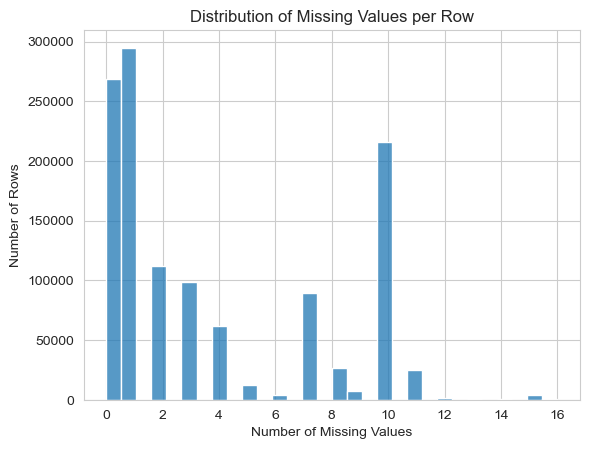

In [14]:
# Calculate the number of missing values for each row
data['missing_count'] = X_train.isnull().sum(axis=1)
# Plot the distribution of missing values per row
sns.histplot(data['missing_count'], kde=False, bins=30)
plt.title('Distribution of Missing Values per Row')
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Rows')
plt.show()

<Axes: >

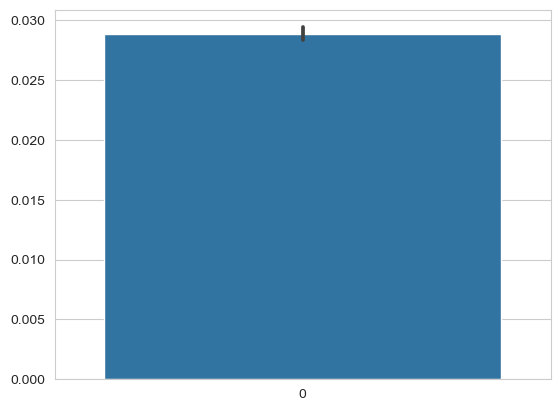

In [15]:
# investigate rows with more than 10 missing values
sns.barplot(data[data['missing_count'] >= 7]['target'])

In [16]:
# they all are non-defaulters, so we drop them
X_train = X_train[data['missing_count'] < 7]
y_train = y_train[data['missing_count'] < 7]

print('Dropped rows:', len(data[data['missing_count'] >= 7].index))

Dropped rows: 370436


In [17]:
# Assuming X_train is your feature DataFrame and y_train is your target Series
# Concatenate the features and the target into one DataFrame for duplicate checking
full_data = pd.concat([X_train, y_train.rename('target')], axis=1)

# Find and drop exact duplicates
deduped_full_data = full_data.drop_duplicates()

# Now, separate the features and the target back into X_train and y_train
X_train = deduped_full_data.iloc[:, :-1]
y_train = deduped_full_data['target']

# Print the number of duplicates removed
num_duplicates_removed = full_data.shape[0] - deduped_full_data.shape[0]
print(f"Number of duplicates removed: {num_duplicates_removed}")

Number of duplicates removed: 4


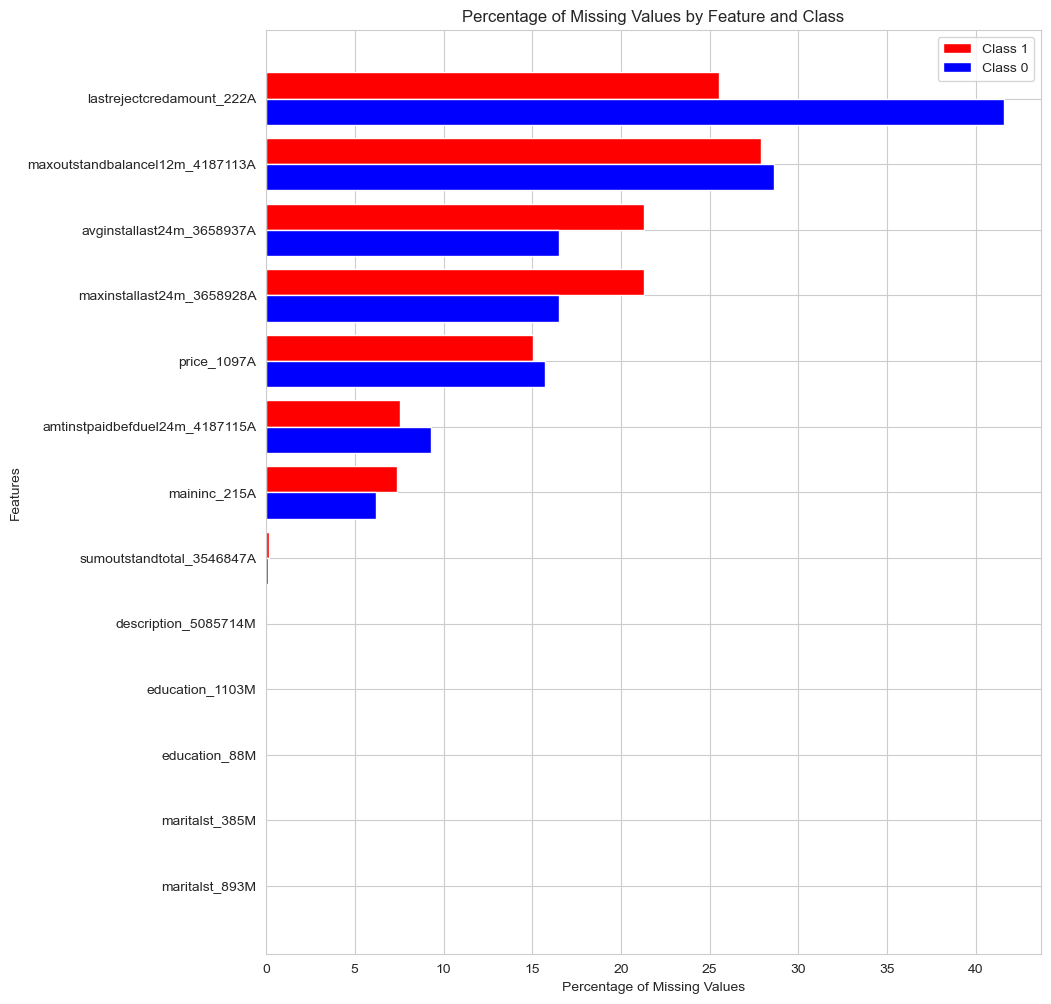

,PercentageMissing,Class 1 Missing,Class 0 Missing,Description
lastrejectcredamount_222A,41.065500,25.520683,41.587720,Credit amount on last rejected application.
maxoutstandbalancel12m_4187113A,28.575710,27.885450,28.598899,Maximum outstanding balance in the last 12 mon...
avginstallast24m_3658937A,16.670604,21.286520,16.515535,Average instalments paid by the client over th...
maxinstallast24m_3658928A,16.670604,21.286520,16.515535,Maximum instalment in the last 24 months
price_1097A,15.691860,15.023865,15.714301,Credit price.
amtinstpaidbefduel24m_4187115A,9.242003,7.542667,9.299091,Number of instalments paid before due date in ...
maininc_215A,6.221155,7.405265,6.181376,Client's primary income amount.
sumoutstandtotal_3546847A,0.105184,0.148250,0.103738,Sum of total outstanding amount.
description_5085714M,0.005641,0.000000,0.005831,Categorization of clients by credit bureau.
education_1103M,0.005641,0.000000,0.005831,Level of education of the client provided by e...


In [18]:
# Calculate the percentage of missing values for each feature overall and within each class
total_missing = X_train.isnull().mean() * 100
class_1_missing = X_train[y_train == 1].isnull().mean() * 100
class_0_missing = X_train[y_train == 0].isnull().mean() * 100

# Create a DataFrame with the correlation and missing values information

#correlations = X_train.corrwith(y_train, numeric_only=False).drop('target')

correlation_and_missing_df = pd.DataFrame({
    #'CorrelationWithTarget': np.abs(correlations),
    'PercentageMissing': total_missing.values,
    'Class 1 Missing': class_1_missing.values,
    'Class 0 Missing': class_0_missing.values,
    'Description': feature_definitions.set_index('Variable').loc[total_missing.index, 'Description']
})

# Filter out features with X% or more missing values
correlation_and_missing_df = correlation_and_missing_df[correlation_and_missing_df['PercentageMissing'] > 0]


# Sort the DataFrame by the total missing values to maintain the order for plotting
correlation_and_missing_df.sort_values(by='PercentageMissing', ascending=False, inplace=True)

# Plotting the missing values by class, with horizontal bars
fig, ax = plt.subplots(figsize=(10, 12))
ind = np.arange(len(correlation_and_missing_df))  # the x locations for the groups
width = 0.4  # the width of the bars

p1 = ax.barh(ind, correlation_and_missing_df['Class 1 Missing'], width, color='red', label='Class 1')
p2 = ax.barh(ind + width, correlation_and_missing_df['Class 0 Missing'], width, color='blue', label='Class 0')

ax.set_title('Percentage of Missing Values by Feature and Class')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(correlation_and_missing_df.index)
ax.legend()

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

# Inverting y-axis to have the feature with most missing values on top
plt.gca().invert_yaxis()

plt.show()

correlation_and_missing_df

In [18]:
erdgdfg

NameError: name 'erdgdfg' is not defined

# Preprocessing

In [19]:
X1 = X_train.copy()
y1 = y_train.copy()

X2 = X_test.copy()
y2 = y_test.copy()

In [20]:
# Identify the numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

### 1. Standardise

In [21]:
# Standardize numerical features
for feature in numerical_features:
    mean = X_train[feature].mean()
    std = X_train[feature].std()
    X_train[feature] = (X_train[feature] - mean) / std

    # Apply the same transformation to X_test
    X_test[feature] = (X_test[feature] - mean) / std


### 2. One-Hot Encode

In [22]:
# One-hot encode categorical features using pd.get_dummies
X_train = pd.get_dummies(X_train, columns=categorical_features, prefix=categorical_features, drop_first=True, dummy_na=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, prefix=categorical_features, drop_first=True, dummy_na=True)

# Correct approach: Ensure X_test has the same columns as X_train, filling missing with 0s
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### 3. Impute Missing Values

In [23]:
X_train_missing_mask = X_train.isnull()

#Fill missing values for numerical features with median
for feature in numerical_features:
    median = X_train[feature].median()
    X_train[feature].fillna(median, inplace=True)
    X_test[feature].fillna(median, inplace=True) # TODO: is this correct?

In [25]:
X_train.head()

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,maritalst_385M_ecd83604,maritalst_385M_Unknown,maritalst_385M_nan,maritalst_893M_46b968c3,maritalst_893M_977b2a70,maritalst_893M_a55475b1,maritalst_893M_e18430ff,maritalst_893M_ecd83604,maritalst_893M_Unknown,maritalst_893M_nan
466,-0.366115,-0.054877,-0.641995,-0.206442,-0.697292,-0.473196,-0.360054,-0.625551,-0.125219,-0.455263,...,0,0,0,0,0,1,0,0,0,0
569,-0.366115,0.256761,-0.641995,-0.206442,-0.264896,-0.473196,-0.360054,-0.174973,-0.125219,1.699933,...,0,0,0,0,0,1,0,0,0,0
579,-0.366115,-0.428934,-0.641995,-0.116299,-0.098337,-0.473196,-0.360054,-1.076130,-0.125219,-0.654619,...,0,0,0,0,0,1,0,0,0,0
663,-0.366115,-0.688762,-0.641995,7.622482,-0.913491,-0.473196,-0.360054,-0.850840,-0.125219,0.352936,...,0,0,0,0,0,1,0,0,0,0
674,-0.366115,-0.765825,-0.641995,-0.009113,-0.471365,-0.473196,-0.360054,-1.076130,-0.125219,-0.586240,...,0,0,0,0,0,1,0,0,0,0


In [26]:
X_test.head()

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,maritalst_385M_ecd83604,maritalst_385M_Unknown,maritalst_385M_nan,maritalst_893M_46b968c3,maritalst_893M_977b2a70,maritalst_893M_a55475b1,maritalst_893M_e18430ff,maritalst_893M_ecd83604,maritalst_893M_Unknown,maritalst_893M_nan
0,-0.366115,0.150799,-0.641995,-0.206442,-0.264896,-0.473196,-0.360054,-0.174973,-0.125219,-0.327945,...,0,0,1,0,0,0,0,0,0,1
1,-0.366115,-0.257103,-0.641995,-0.206442,-0.178417,-0.473196,-0.360054,-0.084857,-0.125219,-0.327945,...,0,0,1,0,0,0,0,0,0,1
2,-0.366115,0.243808,-0.641995,-0.206442,0.253980,-0.473196,-0.360054,0.365721,-0.125219,-0.327945,...,0,0,1,0,0,0,0,0,0,1
3,-0.366115,0.094628,-0.641995,-0.206442,0.383699,-0.473196,-0.360054,0.500894,-0.125219,-0.327945,...,0,0,1,0,0,0,0,0,0,1
4,-0.366115,0.302452,-0.641995,-0.206442,0.599897,-0.473196,-0.360054,0.726183,-0.125219,-0.327945,...,0,0,1,0,0,0,0,0,0,1


## Feature Selection Using Variance

In [27]:
feature_variances = X_train.var()

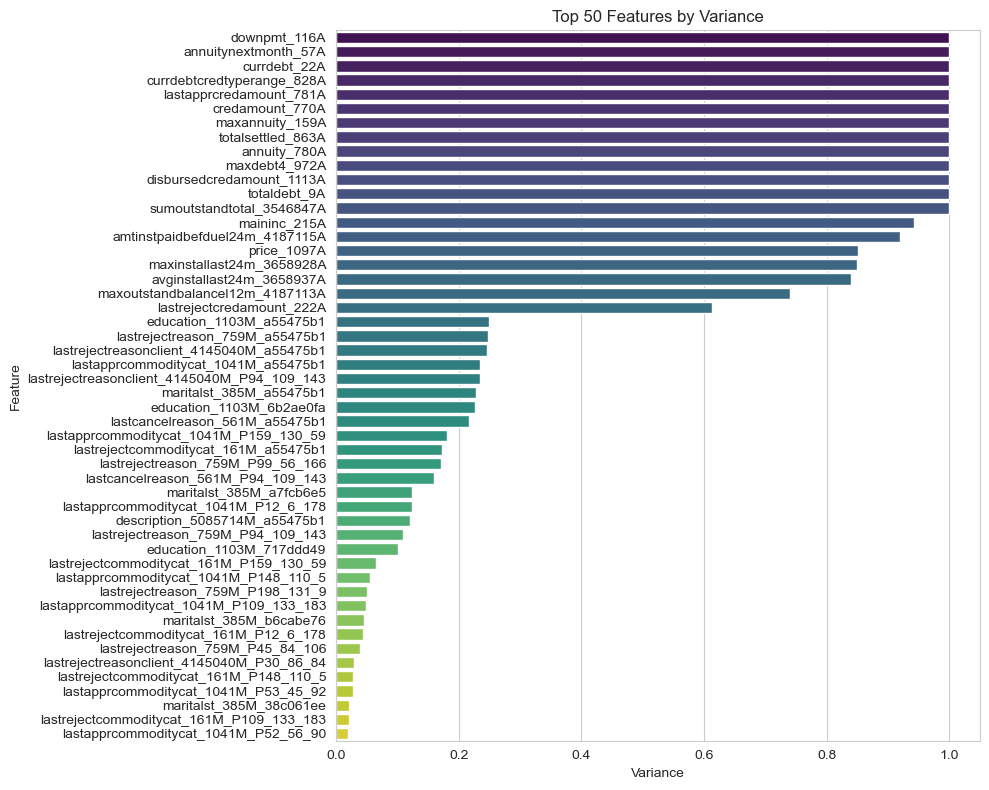

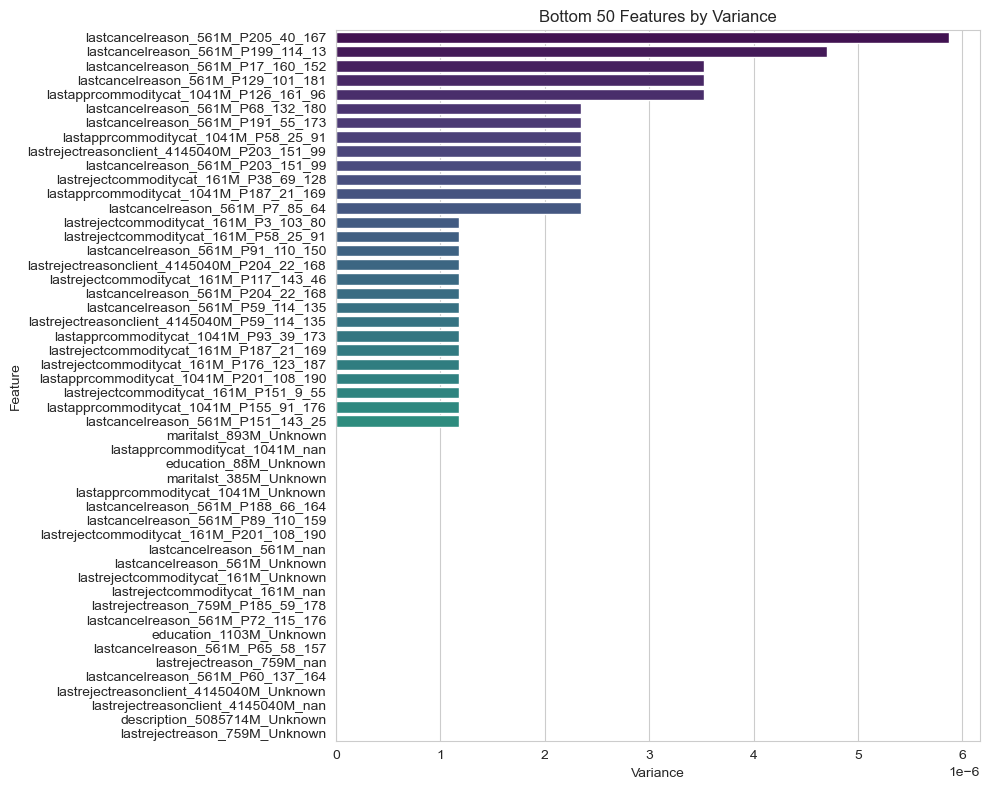

In [28]:
# Convert the variances into a DataFrame for easier plotting
variance_df = feature_variances.reset_index()
variance_df.columns = ['Feature', 'Variance']

# Sort the DataFrame by variance
variance_df = variance_df.sort_values(by='Variance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Variance', y='Feature', data=variance_df.head(50), palette='viridis')
plt.title('Top 50 Features by Variance')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# If you also want to visualize the lowest variance features, you can do:
plt.figure(figsize=(10, 8))
sns.barplot(x='Variance', y='Feature', data=variance_df.tail(50), palette='viridis')
plt.title('Bottom 50 Features by Variance')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [29]:
# drop features with low variance
variance_threshold = 0.1
low_variance_features = variance_df[variance_df['Variance'] < variance_threshold]['Feature']
X_train = X_train.drop(low_variance_features, axis=1)
X_test = X_test.drop(low_variance_features, axis=1)
print('Dropped features:', len(low_variance_features.values))

Dropped features: 211


In [30]:
X_train.head()

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,lastrejectreason_759M_P99_56_166,lastrejectreason_759M_a55475b1,lastrejectreasonclient_4145040M_P94_109_143,lastrejectreasonclient_4145040M_a55475b1,description_5085714M_a55475b1,education_1103M_6b2ae0fa,education_1103M_717ddd49,education_1103M_a55475b1,maritalst_385M_a55475b1,maritalst_385M_a7fcb6e5
466,-0.366115,-0.054877,-0.641995,-0.206442,-0.697292,-0.473196,-0.360054,-0.625551,-0.125219,-0.455263,...,0,0,0,1,1,0,0,1,1,0
569,-0.366115,0.256761,-0.641995,-0.206442,-0.264896,-0.473196,-0.360054,-0.174973,-0.125219,1.699933,...,0,1,0,1,1,0,0,1,1,0
579,-0.366115,-0.428934,-0.641995,-0.116299,-0.098337,-0.473196,-0.360054,-1.076130,-0.125219,-0.654619,...,0,1,0,1,1,0,0,1,0,0
663,-0.366115,-0.688762,-0.641995,7.622482,-0.913491,-0.473196,-0.360054,-0.850840,-0.125219,0.352936,...,0,1,0,1,1,0,0,1,0,1
674,-0.366115,-0.765825,-0.641995,-0.009113,-0.471365,-0.473196,-0.360054,-1.076130,-0.125219,-0.586240,...,0,1,0,1,1,0,0,1,1,0


In [52]:
X_test

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,lastrejectreason_759M_P99_56_166,lastrejectreason_759M_a55475b1,lastrejectreasonclient_4145040M_P94_109_143,lastrejectreasonclient_4145040M_a55475b1,description_5085714M_a55475b1,education_1103M_6b2ae0fa,education_1103M_717ddd49,education_1103M_a55475b1,maritalst_385M_a55475b1,maritalst_385M_a7fcb6e5
0,-0.366115,0.150799,-0.641995,-0.206442,-0.264896,-0.473196,-0.360054,-0.174973,-0.125219,-0.327945,...,0,0,0,1,0,0,0,0,0,0
1,-0.366115,-0.257103,-0.641995,-0.206442,-0.178417,-0.473196,-0.360054,-0.084857,-0.125219,-0.327945,...,0,1,0,1,0,0,0,0,0,0
2,-0.366115,0.243808,-0.641995,-0.206442,0.253980,-0.473196,-0.360054,0.365721,-0.125219,-0.327945,...,0,1,0,1,0,0,0,0,0,0
3,-0.366115,0.094628,-0.641995,-0.206442,0.383699,-0.473196,-0.360054,0.500894,-0.125219,-0.327945,...,0,1,0,1,0,0,0,0,0,0
4,-0.366115,0.302452,-0.641995,-0.206442,0.599897,-0.473196,-0.360054,0.726183,-0.125219,-0.327945,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305327,-0.518666,1.962763,-0.641995,3.724970,3.194276,-0.473196,-0.360054,3.429653,-0.125219,1.537863,...,0,1,0,1,0,0,0,1,0,1
305328,0.025324,-0.837421,-0.641995,-0.410990,-0.550580,-0.473196,-0.360054,-1.076130,-0.125219,-0.994062,...,1,0,1,0,0,1,0,0,0,0
305329,-0.781722,0.184514,-0.641995,-0.206442,0.167501,-0.473196,-0.360054,0.275605,-0.125219,-0.878651,...,1,0,1,0,0,1,0,0,0,0
305330,1.583648,0.254027,0.218071,0.304077,0.167501,-0.343404,-0.360054,0.275605,-0.125219,-0.387913,...,0,1,0,1,0,0,1,0,0,0


## Feature Selection Using Forward Selection

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import make_scorer, roc_auc_score

# Define your logistic regression model
logreg = LogisticRegression()

# Define the cross-validation method
cv = StratifiedKFold(n_splits=5)

# Define your custom scorer, e.g., AUC-ROC for imbalanced datasets
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Initialize the forward selection process
sfs = SFS(estimator=logreg,
          k_features='best',  # Select the best number of features
          forward=True,  # Set to True for forward selection
          floating=False,  # Set to False for standard forward selection
          scoring=auc_scorer,  # Use AUC-ROC as the scoring metric
          cv=cv,
          verbose=True)

# Perform forward selection on the training data
sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices and print them
selected_features = list(sfs.k_feature_idx_)
print("Selected features:", selected_features)

# Transform X_train and X_test to contain only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   29.7s finished
Features: 1/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   58.7s finished
Features: 2/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished
Features: 3/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.3min finished
Features: 4/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.5min finished
Features: 5/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.6min finished
Features: 6/37[Parallel(

Selected features: [0, 2, 3, 7, 8, 9, 11, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36]


In [57]:
X_train_selected

array([[-0.36611531, -0.6419954 , -0.20644163, ...,  1.        ,
         1.        ,  0.        ],
       [-0.36611531, -0.6419954 , -0.20644163, ...,  1.        ,
         1.        ,  0.        ],
       [-0.36611531, -0.6419954 , -0.11629902, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.58309479, -0.6419954 , -0.42515121, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.97279526,  0.25288917,  0.43478232, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37592232,  0.30340685,  0.15477935, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
print(2)

In [93]:
y_train['target']

KeyError: 'target'

In [139]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dval = xgb.DMatrix(X_test_selected, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Objective for binary classification
    'eval_metric': ['auc'] ,  # Use AUC as evaluation metric
    'max_depth':25,  # Example parameter, adjust based on dataset
    'eta': 0.03,  # Learning rate, example value
    'subsample': 0.4,  # Subsample ratio of the training instances, example value
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree, example value
    'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],
    'min_child_weight': 2,
    'gamma': 0.5,
}

# Train model
evals = [(dtrain, 'train'), (dval, 'eval')]
modelXGB = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=10, evals=evals, maximize=True, verbose_eval=True)

# Save model
#model.save_model('xgb_model.model')

[0]	train-auc:0.77079	eval-auc:0.58300
[1]	train-auc:0.84537	eval-auc:0.60414
[2]	train-auc:0.88829	eval-auc:0.62239
[3]	train-auc:0.91407	eval-auc:0.62463
[4]	train-auc:0.93166	eval-auc:0.62909
[5]	train-auc:0.94395	eval-auc:0.63679
[6]	train-auc:0.95363	eval-auc:0.63969
[7]	train-auc:0.96010	eval-auc:0.64304
[8]	train-auc:0.96560	eval-auc:0.64204
[9]	train-auc:0.96913	eval-auc:0.64693
[10]	train-auc:0.97178	eval-auc:0.64595
[11]	train-auc:0.97500	eval-auc:0.64607
[12]	train-auc:0.97694	eval-auc:0.64979
[13]	train-auc:0.97941	eval-auc:0.65239
[14]	train-auc:0.98141	eval-auc:0.65429
[15]	train-auc:0.98220	eval-auc:0.65590
[16]	train-auc:0.98348	eval-auc:0.65249
[17]	train-auc:0.98479	eval-auc:0.65408
[18]	train-auc:0.98588	eval-auc:0.65439
[19]	train-auc:0.98674	eval-auc:0.65534
[20]	train-auc:0.98751	eval-auc:0.65683
[21]	train-auc:0.98858	eval-auc:0.65816
[22]	train-auc:0.98945	eval-auc:0.65941
[23]	train-auc:0.99015	eval-auc:0.66098
[24]	train-auc:0.99079	eval-auc:0.66202
[25]	train

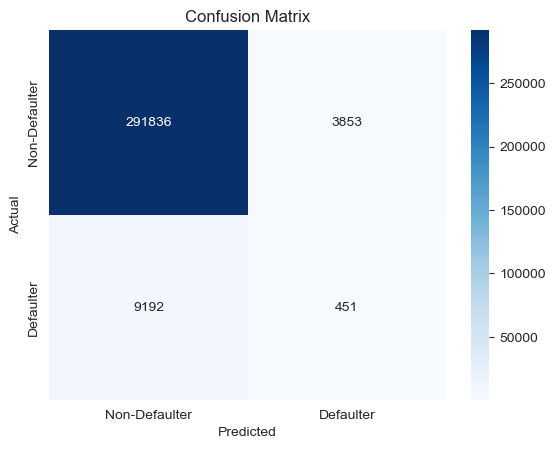

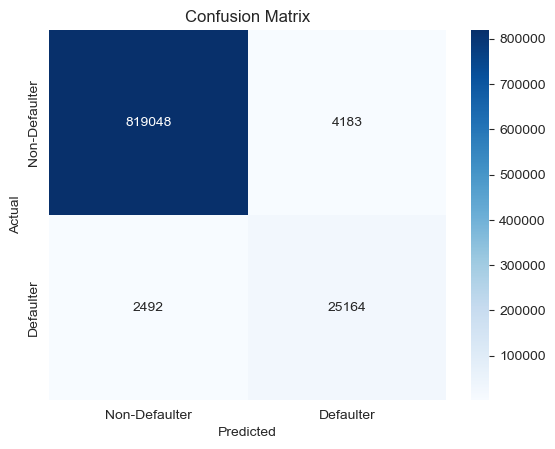

In [140]:
from sklearn.metrics import confusion_matrix

y_pred_proba = modelXGB.predict(dval)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred = [1 if prob > threshold else 0 for prob in y_pred_proba]
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the validation set
y_pred_proba = modelXGB.predict(dtrain)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred = [1 if prob > threshold else 0 for prob in y_pred_proba]
cm = confusion_matrix(y_train, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# Classes
classes = np.unique(y_train)
# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

class_weights = {0: 1, 1: 24}  # Non-defaulters: Defaulters


# Create and fit the model
model = LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weights, verbose=True)
model.fit(X_train_selected, y_train)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 2
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 8
iter   7  #CD cycles 1
iter   8  #CD cycles 17
iter   9  #CD cycles 1
iter  10  #CD cycles 17
iter  11  #CD cycles 10
iter  12  #CD cycles 3
iter  13  #CD cycles 2
iter  14  #CD cycles 3
iter  15  #CD cycles 1
iter  16  #CD cycles 57
iter  17  #CD cycles 12
iter  18  #CD cycles 2
iter  19  #CD cycles 1
iter  20  #CD cycles 55
iter  21  #CD cycles 6
iter  22  #CD cycles 2
iter  23  #CD cycles 4
iter  24  #CD cycles 2
iter  25  #CD cycles 1
iter  26  #CD cycles 48
iter  27  #CD cycles 19
iter  28  #CD cycles 3
iter  29  #CD cycles 1
iter  30  #CD cycles 66
iter  31  #CD cycles 2
iter  32  #CD cycles 2
optimization finished, #iter = 32
Objective value = 924683.155804
#nonzeros/#features = 27/27


LogisticRegression(class_weight={0: 1, 1: 24}, penalty='l1', solver='liblinear',
                   verbose=True)

In [142]:
y_pred = model.predict(X_test_selected)
confusion_matrix(y_test, y_pred)

array([[226270,  69419],
       [  4843,   4800]])

### Step 1: Initial Simple Imputation
We will start by applying simple imputation techniques to fill in the missing values. For numerical features, we'll use the median value, and for categorical features, we'll use a constant placeholder.

#### Standardization and One-Hot Encoding and *NO* Imputation
To see which values were imputed

In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify the numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median', add_indicator=False)),  # Median imputation for numerical features
    ('scaler', StandardScaler())  # Standardization
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing', add_indicator=False)),  # Placeholder for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Apply the transformations
X_train_preprocessed_NOT_IMPUTED = preprocessor.fit_transform(X_train)

cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()
# Combine with the numerical feature names
all_feature_names = numerical_features.to_list() + cat_feature_names.tolist()

# Convert the processed data to a DataFrame
X_train_preprocessed_NOT_IMPUTED = pd.DataFrame(X_train_preprocessed_NOT_IMPUTED.toarray(), columns=all_feature_names, index=X_train.index)

# Now you can view the first few rows
X_train_preprocessed_NOT_IMPUTED.head(5)


,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,x8_b6cabe76,x8_ecd83604,x8_missing,x9_1a19667c,x9_46b968c3,x9_977b2a70,x9_a55475b1,x9_e18430ff,x9_ecd83604,x9_missing
466,NaN,-0.054877,-0.641996,NaN,-0.697293,-0.473196,-0.360054,-0.625552,-0.125219,-0.455263,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
569,NaN,0.256761,-0.641996,NaN,-0.264896,-0.473196,-0.360054,-0.174973,-0.125219,1.699934,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
579,NaN,-0.428934,-0.641996,-0.116299,-0.098337,-0.473196,-0.360054,-1.076130,-0.125219,-0.654619,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
663,NaN,-0.688762,-0.641996,7.622487,-0.913491,-0.473196,-0.360054,-0.850841,-0.125219,0.352936,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
674,NaN,-0.765826,-0.641996,-0.009113,-0.471366,-0.473196,-0.360054,-1.076130,-0.125219,-0.586240,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Standardization and One-Hot Encoding and Imputation

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming X_train is defined

# Identify the numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=False)),  # Median imputation for numerical features
    ('scaler', StandardScaler())  # Standardization
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing', add_indicator=False)),  # Placeholder for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Apply the transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)

# For the categorical features, get feature names and replace the generic 'x0_', 'x1_', etc., with the actual feature names
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()
new_cat_feature_names = []
for orig_feat, cat_feat in zip(categorical_features, cat_feature_names):
    # Split the category name from the feature index (e.g., 'x0_type1' -> ['x0', 'type1'])
    split_name = cat_feat.split("_", 1)
    # Replace the index ('x0', 'x1', etc.) with the original feature name and append
    if len(split_name) > 1:  # Check to prevent index errors
        new_name = f"{orig_feat}_{split_name[1]}"
        new_cat_feature_names.append(new_name)
    else:
        new_cat_feature_names.append(orig_feat)

# Combine with the numerical feature names
all_feature_names = numerical_features.to_list() + new_cat_feature_names

# Convert the processed data to a DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=all_feature_names, index=X_train.index)

# Now you can view the first few rows
X_train_preprocessed_df.head()


ValueError: Shape of passed values is (850887, 236), indices imply (850887, 30)

#### Get Mask of Missing Values

In [22]:
new_cat_feature_names

['lastapprcommoditycat_1041M_P100_96_175',
 'lastcancelreason_561M_P105_126_172',
 'lastrejectcommoditycat_161M_P109_133_183',
 'lastrejectreason_759M_P110_120_162',
 'lastrejectreasonclient_4145040M_P117_143_46',
 'description_5085714M_P121_6_80',
 'education_1103M_P126_161_96',
 'education_88M_P128_43_169',
 'maritalst_385M_P12_6_178',
 'maritalst_893M_P137_157_60']

In [157]:
X_train_missing_values = X_train_preprocessed_NOT_IMPUTED.isnull()
X_train_missing_values

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,lastapprcredamount_781A,...,x8_b6cabe76,x8_ecd83604,x8_missing,x9_1a19667c,x9_46b968c3,x9_977b2a70,x9_a55475b1,x9_e18430ff,x9_ecd83604,x9_missing
466,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
579,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
674,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Step 2: Down-sampling Using Clusters
To reduce the size of the data and make the computations more manageable, we will down-sample the dataset using KMeans clustering.


In [51]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids (random_state=0)
X_train_resampled, _train_resampled = cc. fit_resample(
    X_train, y_train)

/Users/filipp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(

KeyboardInterrupt

